In [1]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-12-06 18:21:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2018-12-06 18:21:19 (10.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [43]:
df = pd.read_csv('loan_train.csv')

In [44]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [45]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [46]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [47]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [61]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [48]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [49]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

In [50]:
df.drop(['effective_date','due_date'],axis=1,inplace=True)

In [51]:
df.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
loan_status    346 non-null object
Principal      346 non-null int64
terms          346 non-null int64
age            346 non-null int64
education      346 non-null object
Gender         346 non-null object
dtypes: int64(3), object(3)
memory usage: 16.3+ KB


In [56]:
X = df[['Principal', 'terms', 'age', 'education', 'Gender']].values
X[0:5]

array([[1000, 30, 45, 'High School or Below', 'male'],
       [1000, 30, 33, 'Bechalor', 'female'],
       [1000, 15, 27, 'college', 'male'],
       [1000, 30, 28, 'college', 'female'],
       [1000, 30, 29, 'college', 'male']], dtype=object)

In [57]:
from sklearn import preprocessing
le_edu = preprocessing.LabelEncoder()
le_edu.fit(['High School or Below','college','Bechalor','Master or Above'])
X[:,3] = le_edu.transform(X[:,3]) 


le_sex = preprocessing.LabelEncoder()
le_sex.fit([ 'male', 'female'])
X[:,4] = le_sex.transform(X[:,4])

X[0:5]

array([[1000, 30, 45, 1, 1],
       [1000, 30, 33, 0, 0],
       [1000, 15, 27, 3, 1],
       [1000, 30, 28, 3, 0],
       [1000, 30, 29, 3, 1]], dtype=object)

In [86]:
y = df["loan_status"].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [89]:
le_stau = preprocessing.LabelEncoder()
le_stau.fit(['PAIDOFF','COLLECTION'])
y = le_stau.transform(y) 



y[0:5]

array([1, 1, 1, 1, 1])

In [90]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.64691859,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -1.5212695 , -2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055,  1.10178323,  0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  1.10178323, -2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 ,  1.10178323,  0.42056004]])

In [91]:
from sklearn.model_selection import train_test_split

## KNN Model

In [92]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [95]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 0, 1])

### Model Evaluation

In [96]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.739130434783
Test set Accuracy:  0.671428571429


In [97]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.64285714,  0.54285714,  0.7       ,  0.67142857,  0.77142857,
        0.71428571,  0.74285714,  0.71428571,  0.74285714])

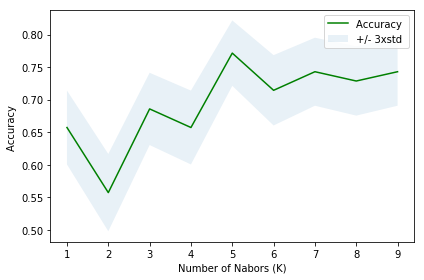

In [68]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [98]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.771428571429 with k= 5


In [99]:
k = 5
#Train Model and Predict  
neigh1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
yhat1 = neigh.predict(X_test)
yhat1[0:5]

array([1, 1, 1, 0, 1])

### Jaccard index

In [101]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  0.757246376812
Test set Accuracy:  0.742857142857


### f1 score

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_test,yhat1))

             precision    recall  f1-score   support

          0       0.20      0.07      0.10        15
          1       0.78      0.93      0.85        55

avg / total       0.66      0.74      0.69        70



### Log loss

In [104]:
from sklearn.metrics import log_loss

In [105]:
print(log_loss(y_test,yhat1))

8.88155956389


## Decision Tree model

In [106]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [107]:
X_trainset.shape

(242, 5)

In [109]:
y_trainset.shape

(242,)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
predTree = Tree.predict(X_testset)

In [115]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
[1 1 0 0 1]


### Evaluation

### jaccard index

In [119]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.740384615385


### F1 SCORE

In [120]:
print(classification_report(y_testset,predTree))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.74      1.00      0.85        77

avg / total       0.55      0.74      0.63       104



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Log Loss

In [121]:
print(log_loss(y_testset,predTree))

8.9670053057


## SVM MODEL

In [122]:
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainsvm.shape,  y_trainsvm.shape)
print ('Test set:', X_testsvm.shape,  y_testsvm.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


In [123]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainsvm, y_trainsvm) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
yhatsvm = clf.predict(X_testsvm)
yhatsvm [0:5]

array([1, 1, 1, 1, 1])

In [125]:
y_testsvm[0:5]

array([1, 1, 1, 1, 1])

### MODEL EVALUATION

### Jaccard index

In [126]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testsvm, yhatsvm))

DecisionTrees's Accuracy:  0.785714285714


### F1 score

In [127]:
print(classification_report(y_testsvm,yhatsvm))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.79      1.00      0.88        55

avg / total       0.62      0.79      0.69        70



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### LOG LOSS

In [128]:
print(log_loss(y_testsvm,yhatsvm))

7.40133771264


## LOGISTIC REGRESSION

In [129]:
X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainlog.shape,  y_trainlog.shape)
print ('Test set:', X_testlog.shape,  y_testlog.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainlog,y_trainlog)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
yhatlog = LR.predict(X_testlog)
yhatlog

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [134]:
y_testlog

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1])

In [133]:
yhat_prob = LR.predict_proba(X_testlog)
yhat_prob

array([[ 0.43312501,  0.56687499],
       [ 0.38304069,  0.61695931],
       [ 0.39785039,  0.60214961],
       [ 0.44899743,  0.55100257],
       [ 0.42385469,  0.57614531],
       [ 0.40768805,  0.59231195],
       [ 0.41812857,  0.58187143],
       [ 0.4082126 ,  0.5917874 ],
       [ 0.44899743,  0.55100257],
       [ 0.42582242,  0.57417758],
       [ 0.44394373,  0.55605627],
       [ 0.43387205,  0.56612795],
       [ 0.32144045,  0.67855955],
       [ 0.44067124,  0.55932876],
       [ 0.36410861,  0.63589139],
       [ 0.33946036,  0.66053964],
       [ 0.45330773,  0.54669227],
       [ 0.40103289,  0.59896711],
       [ 0.43890159,  0.56109841],
       [ 0.41564303,  0.58435697],
       [ 0.37155127,  0.62844873],
       [ 0.4313623 ,  0.5686377 ],
       [ 0.44319293,  0.55680707],
       [ 0.39255445,  0.60744555],
       [ 0.33205919,  0.66794081],
       [ 0.4381526 ,  0.5618474 ],
       [ 0.44067124,  0.55932876],
       [ 0.29481297,  0.70518703],
       [ 0.44142115,

### MODEL EVALUATION

### JACCARD INDEX

In [136]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testlog, yhatlog)

0.7857142857142857

### F1 SCORE

In [137]:
print(classification_report(y_testlog,yhatlog))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.79      1.00      0.88        55

avg / total       0.62      0.79      0.69        70



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### LOG LOSS

In [138]:
print(log_loss(y_testlog,yhatlog))

7.40133771264
